In [58]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model + Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('train.csv')

# print the first 5 rows od dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
#check the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
#fill the missing values
    # The Titanic dataset has some passengers whose Age value is missing (NaN).
    # Missing ages can confuse the model — it expects numeric values.
    # So we fill (fillna) those empty values with the median age of all passengers.

df['Age'].fillna(df['Age'].median(), inplace=True)

# Why use median instead of mean?
    # The median is less sensitive to extreme outliers.
    # Example: If one person’s age is 80 while most are around 20–40,the mean would shift upward. The median stays realistic.

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# The Embarked column represents the port where each passenger boarded the Titanic:

    # C = Cherbourg
    # Q = Queenstown
    # S = Southampton
    # A few passengers have missing values here too.
    # We fill missing values with the most common port (the mode).

# Drop unnecessary columns safely
df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True, errors='ignore')

In [31]:
# check the null values again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [32]:
# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,7.2500,S,2
1,2,1,1,female,38.0,71.2833,C,2
2,3,1,3,female,26.0,7.9250,S,1
3,4,1,1,female,35.0,53.1000,S,2
4,5,0,3,male,35.0,8.0500,S,1


In [55]:
# identify the features and traget variables
x = df.drop('Survived',axis=1)
y = df['Survived']

print("Feature Columns: " , list(x.columns))
print("Target Variable: ")
print(y.value_counts())

print("X shape",x.shape)
print("Y shape",y.shape)

Feature Columns:  ['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']
Target Variable: 
Survived
0    549
1    342
Name: count, dtype: int64
X shape (891, 7)
Y shape (891,)


In [72]:
# Identify the Column types
numeric_features = ['Age', 'Fare', 'FamilySize']
categorical_features = ['Sex', 'Embarked', 'Pclass']

In [73]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=300))
])

# | Parameter                 | Purpose                                                   |
# | ------------------------- | --------------------------------------------------------- |
# | `drop='first'`            | Avoid dummy variable trap                                 |
# | `handle_unknown='ignore'` | Prevent errors when unseen categories appear              |
# | Result                    | Converts categorical text into numeric 0/1 columns safely |


# max_iter=300 just means “the algorithm can update its weights up to 300 times while learning.”
# If it finds the best weights earlier, it’ll stop sooner.
# If it hasn’t converged after 100 iterations (default), increasing to 300 helps it finish training successfully.


In [71]:
# split the dataset into traning set:80% and testing set: 20%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (712, 7)
X_test shape: (179, 7)
Y_train shape: (712,)
Y_test shape: (179,)


In [74]:
#train the model
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [75]:
# Evaluate
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 80.45 %

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



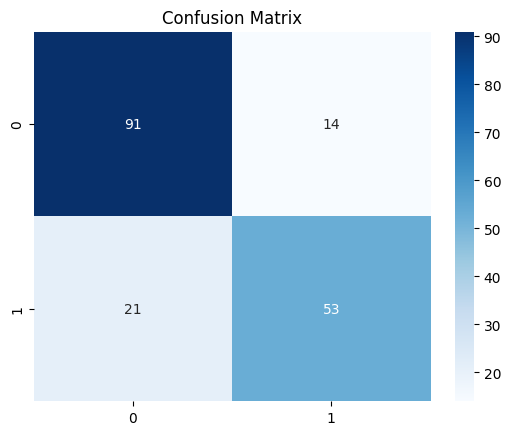

In [76]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [78]:
train_acc = model.score(x_train, y_train)
test_acc = model.score(x_test, y_test)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:     {test_acc:.4f}")

if train_acc > test_acc + 0.05:
    print("⚠️ Possible Overfitting detected (train >> test).")
elif train_acc < 0.6:
    print("⚠️ Possible Underfitting detected (low train acc).")
else:
    print("✅ Model seems balanced.")

Training Accuracy: 0.8076
Test Accuracy:     0.8045
✅ Model seems balanced.


In [84]:
import joblib
joblib.dump(model, "titanic_pipeline_model.pkl")

['titanic_pipeline_model.pkl']

In [85]:
pipeline = joblib.load("titanic_pipeline_model.pkl")
